<a href="https://colab.research.google.com/github/turankeles/web-scraping/blob/main/cars268.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
import datetime
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use("seaborn")

In [ ]:
from selenium import webdriver 
from selenium.webdriver.common.keys import Keys 
from bs4 import BeautifulSoup 
import requests
import time
mile,price,title,transmission,mpg,engine=[[] for i in range(6)]

base="https://www.cars.com"
driver=webdriver.Chrome("C:/chromedriver.exe")
page=1
for i in range(250):
    url=f"https://www.cars.com/shopping/results/?page={page}&page_size=20&list_price_max=&makes[]=&maximum_distance=all&models[]=&stock_type=all&zip="
    
    driver.get(url)
    driver.maximize_window
    source=driver.page_source
    soup=BeautifulSoup(source,"html.parser")
    
    for i in soup.findAll("div",class_="vehicle-details"):
        mode=i.findAll("a",class_="vehicle-card-link js-gallery-click-link")
        url1=base+mode[0]["href"]
        driver.get(url1)
        source1=driver.page_source
        soup1=BeautifulSoup(source1,"html.parser")
        trans=[soup1.findAll("dd")[i].text.strip("\n") for i in range(15) ][5]
        engin=[soup1.findAll("dd")[i].text.strip("\n") for i in range(15) ][6]
        horse=[soup1.findAll("dd")[i].text.strip("\n") for i in range(15) ][3].replace("\n\n","")[:6]
        titl=soup1.findAll("h1",class_="listing-title")[0].text
        mil=soup1.findAll("div",class_="listing-mileage")[0].text.strip(" mi.").replace(",","")
        pric=soup1.findAll("span",class_="primary-price")[0].text.strip("$").replace(",","")
        transmission.append(trans)
        mpg.append(horse)
        engine.append(engin)
        title.append(titl)
        price.append(pric)
        mile.append(mil)
    if page%10==0:
      print(page)    
    page+=1    
    


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [3]:
df=pd.read_excel("/content/cars.xlsx")
df=df.iloc[:,1:]
df=pd.DataFrame([title,mile,price,transmission,mpg,engine]).T
df.columns=["title","mile","price","transmission","mpg","engine"]
df["car"]=[i.split()[1] for i in df.title]
df["year"]=[int(i.split()[0]) for i in df.title]
df["v_engine"]=[(i.split()[0].strip("L")) for i in df.engine]
df["series"]=[i.split()[2] for i in df.title]
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
df["encode_series"]=(encode.fit_transform(df.series))
mpeg=[(i.split()[0][:2].strip()) if '0–' not in i or  '–' not in i else 15 for i in df.mpg]
mpge=[]
for i in mpeg:
  if i=='–':
    mpge.append(15)
  else:
    mpge.append(int(i))  
df["mpge"]=mpge    
df["vengine"]=[float(i) if "." in i else 2 for i in df.v_engine]
print(df.shape)
df
tree=DecisionTreeClassifier()
X,y=df.loc[:,["mile","price","year","vengine","mpge","encode_series"]].values,df.car
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.25)

while True:
  xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)
  tree.fit(xtrain,ytrain)
  pred_tree=tree.predict(xtest)
  score =(accuracy_score(pred_tree,ytest))

  # kk=input()
  if score>=0.9:
    import pickle
    pickle.dump(tree,open("decisiontree.sav","wb"))
    print(score)
    break

(268, 13)
0.9074074074074074


 maximum accuracy: 0.7962962962962963 
 minimum accuracy 0.42592592592592593


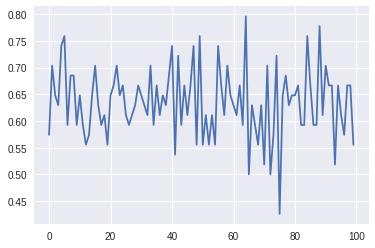

In [4]:
def machine(classifier):
  a=classifier()
  skor=[]
  for i in range(100):
    xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)
    a.fit(xtrain,ytrain)
    pred=a.predict(xtest)
    skor.append(accuracy_score(pred,ytest))
  print(" maximum accuracy:",max(skor),"\n","minimum accuracy",min(skor))
  plt.plot(skor);

machine(DecisionTreeClassifier);  

In [ ]:
df.shape

NameError: ignored

In [ ]:
X,y=df.loc[:,["mile","price","year","vengine","mpge","encode_series"]].values,df.car
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.25)
score=[]
for i in range(300):
  tree=DecisionTreeClassifier()
  xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)
  tree.fit(xtrain,ytrain)
  pred_tree=tree.predict(xtest)
  score.append(accuracy_score(pred_tree,ytest))
max(score),min(score)  

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
df["encode_series"]=(encode.fit_transform(df.series))

In [ ]:
print(df.shape)
df

(268, 13)


,title,mile,price,transmission,mpg,engine,car,year,v_engine,series,encode_series,mpge,vengine
0,2018 BMW 340 i xDrive,22161,44990,8-Speed Automatic,21–31,3.0L I6 24V GDI DOHC Turbo,BMW,2018,3.0,340,4,21,3.0
1,2021 Toyota 4Runner TRD Off Road Premium,12868,52995,5-Speed Automatic,16–19,4.0L V6 24V MPFI DOHC,Toyota,2021,4.0,4Runner,7,16,4.0
2,2021 Volkswagen Atlas Cross Sport 3.6L V6 SEL,25899,44634,8-Speed Automatic,18–23,3.6L V6 24V GDI DOHC,Volkswagen,2021,3.6,Atlas,18,18,3.6
3,2018 Ford Explorer Limited,48672,34800,6-Speed Automatic,18–25,2.3L I4 16V GDI DOHC Turbo,Ford,2018,2.3,Explorer,42,18,2.3
4,2015 Ford Mustang V6,46427,23245,6-Speed,17–28,3.7L V6 24V MPFI DOHC,Ford,2015,3.7,Mustang,67,17,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,2017 Toyota RAV4 Hybrid SE,78373,25950,Automatic CVT,34–30,2.5L I4 16V MPFI DOHC Hybrid,Toyota,2017,2.5,RAV4,80,34,2.5
264,2021 Lincoln Navigator Reserve,16534,82995,10-Speed Automatic,16–20,3.5L V6 24V PDI DOHC Twin Turbo,Lincoln,2021,3.5,Navigator,69,16,3.5
265,2020 Ford Expedition Max Limited,27441,65125,10-Speed Automatic,16–21,3.5L V6 24V GDI DOHC Twin Turbo,Ford,2020,3.5,Expedition,41,16,3.5
266,2013 Mercedes-Benz E-Class E 350,87351,17897,7-Speed Automatic,20–28,3.5L V6 24V GDI DOHC,Mercedes-Benz,2013,3.5,E-Class,37,15,3.5


In [ ]:
mpeg=[(i.split()[0][:2].strip()) if '0–' not in i or  '–' not in i else 15 for i in df.mpg]
mpge=[]
for i in mpeg:
  if i=='–':
    mpge.append(15)
  else:
    mpge.append(int(i))  
df["mpge"]=mpge    

In [ ]:
len(set(df.series)),len(df.series)

(108, 268)

In [ ]:
df.columns

Index(['title', 'mile', 'price', 'transmission', 'mpg', 'engine', 'car',
       'year', 'v_engine', 'series', 'encode_series', 'mpge'],
      dtype='object')

In [ ]:
df["vengine"]=[float(i) if "." in i else 2 for i in df.v_engine]

In [ ]:
X,y=df.loc[:,["mile","price","year","vengine","mpge","encode_series"]].values,df.car
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.25)

In [ ]:
score=[]
for i in range(300):
  tree=DecisionTreeClassifier()
  xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)
  tree.fit(xtrain,ytrain)
  pred_tree=tree.predict(xtest)
  score.append(accuracy_score(pred_tree,ytest))
max(score),min(score)  

(0.8148148148148148, 0.4074074074074074)

In [ ]:
tree=DecisionTreeClassifier()

while True:
  xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)
  tree.fit(xtrain,ytrain)
  pred_tree=tree.predict(xtest)
  score =(accuracy_score(pred_tree,ytest))

  # kk=input()
  if score>=0.945:
    import pickle
    pickle.dump(tree,open("decisiontree.sav","wb"))
    print(score)
    break

In [ ]:
flag=True
while flag:
  xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)
  tree.fit(xtrain,ytrain)
  pred_tree=tree.predict(xtest)
  score =(accuracy_score(pred_tree,ytest))

  # kk=input()
  if score>=0.92:
    import pickle
    pickle.dump(tree,open("decisiontreemodel.sav","wb"))
    print("Accuracay score: ",score)
    flag=False

In [ ]:
model=pickle.load(open("decisiontreemodel.sav","rb"))

In [ ]:
accuracy_score(model.predict(xtest),ytest)